In [ ]:
"""
The only difference here is that the entire dataset is used. This makes the model execution much slower, but it also nearly doubles the accuracy of the model
"""

In [ ]:
"""
Run once ever

Downloads and extracts the dataset
"""


import urllib.request
import tarfile
import os

mp3file = urllib.request.urlopen("https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz")
with open('tmp','wb') as output:
  output.write(mp3file.read())

file = tarfile.open("tmp")
file.extractall(".")
file.close()
os.remove("tmp")
os.remove("cifar-100-python/file.txt~")

In [2]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import cv2
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [4]:
trainData = unpickle('./cifar-100-python/train')
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [5]:
testData = unpickle('./cifar-100-python//test')
metaData = unpickle('./cifar-100-python//meta')
#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [6]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)

         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [ ]:
# I'm pretty sure this is set up so that dimension 0 is the category
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [8]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
#X_test

Image number selected : 39885
Shape of image : (32, 32, 3)
Image subcategory number: 97
Image subcategory name: Wolf


/tmp/ipykernel_10921/2356857472.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))


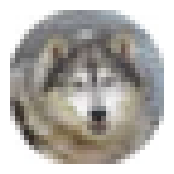

In [9]:
#generating a random number to display a random image from the dataset along with the label's number and name
#setting the figure size
rcParams['figure.figsize'] = 2,2
#generating a random number
imageId = np.random.randint(0, len(X_train))
#showing the image at that id
plt.imshow(X_train[imageId])
#setting display off for the image
plt.axis('off')
#displaying the image id
print("Image number selected : {}".format(imageId))
#displaying the shape of the image
print("Shape of image : {}".format(X_train[imageId].shape))

#displaying the subcategory number
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
#displaying the subcategory name
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [10]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
cellSize = (4,4)
nbins = 9


df = []

**Create Database of HOGs** 
(Pandas dataframe)

In [ ]:
# this is essentially where we fit the model
for i in range(len(X_train)):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY) # convert the colorspace to grayscale
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    df.append(hog.compute(image))
    
DF = pd.DataFrame(df)


In [12]:
DF

,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.032799,0.015301,0.045787,0.000000,0.069334,0.000000,0.000000,0.000000,0.032799,0.067754,...,0.098908,0.316263,0.316263,0.248816,0.060455,0.195416,0.000000,0.025893,0.150303,0.213901
1,0.006916,0.000000,0.000000,0.000000,0.241620,0.000000,0.000000,0.000000,0.006916,0.016505,...,0.000000,0.055166,0.000000,0.000000,0.000000,0.699561,0.000000,0.000000,0.000000,0.055166
2,0.327324,0.175260,0.089584,0.062461,0.073516,0.000000,0.000000,0.000000,0.047610,0.327324,...,0.248223,0.292329,0.292329,0.197668,0.280417,0.292329,0.000000,0.000000,0.000000,0.034408
3,0.097244,0.235721,0.044991,0.010438,0.005530,0.000000,0.000000,0.000000,0.008888,0.155014,...,0.058511,0.069262,0.084507,0.002409,0.000000,0.305709,0.124439,0.305709,0.305709,0.095173
4,0.227998,0.040255,0.278890,0.130381,0.014747,0.007472,0.119501,0.278890,0.096910,0.072541,...,0.261557,0.148019,0.049396,0.163622,0.247557,0.261557,0.261557,0.198627,0.261557,0.261557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.014346,0.002504,0.039960,0.024616,0.042274,0.044265,0.236928,0.251363,0.048470,0.019375,...,0.088355,0.062786,0.284566,0.284566,0.284566,0.284566,0.043826,0.017282,0.039374,0.079577
49996,0.049246,0.108321,0.099552,0.040950,0.175260,0.170823,0.130690,0.209808,0.089942,0.093080,...,0.248138,0.176081,0.208774,0.248138,0.248138,0.248138,0.090567,0.127934,0.119982,0.248138
49997,0.105599,0.160996,0.087342,0.291104,0.379031,0.055069,0.008135,0.032572,0.157255,0.244510,...,0.196444,0.318444,0.140275,0.062645,0.318444,0.318444,0.318444,0.057260,0.059514,0.084013
49998,0.052827,0.020290,0.005121,0.309802,0.309802,0.178927,0.063858,0.024365,0.019373,0.081558,...,0.171111,0.122310,0.068471,0.190761,0.226513,0.401816,0.193637,0.236955,0.052534,0.076915


****continue work checkpoint: standardize test data and proceed****

In [ ]:
def predict(img,k):
    
    #Extract sample's features
    
    sample = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    _hog = hog.compute(sample)
    
    #Get Nearest Neighbors
    distances = []
    for i in range(len(DF)):
        distances.append(np.linalg.norm(_hog - DF.iloc[i]))         # 1- Calculate and store each datapoint's Euclidean distance
        
    kNNsID = np.argsort(distances)[:k]                              # 2- Sort distances' IDs in an ascending order
    
    kNNsCats = []
    for i in kNNsID:
        kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
    
    CommonCat = Counter(kNNsCats).most_common(1)                    # 4- Count and get Most common category
    
    return CommonCat

In [14]:
n = 25
p = predict(X_test[n], 20)

/tmp/ipykernel_10921/952172700.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs


In [ ]:
def getAccuracy(k,x_test,testdata):
    RightCount = 0
    preds = []
    for i in range(1000):
        #print("1")
        pred = predict(x_test[i], k)
        #print("2")
        if pred[0][0] == subCategory.iloc[testdata['fine_labels'][i]][0].capitalize():
            #print("3")
            RightCount += 1
            #print("4")
        print("Done: {}, Accuracy: {}".format(i, (RightCount / (i + 1)) * 100))
        preds.append(pred)
    return preds

In [ ]:
Preds14, Accuracies = getAccuracy(14, X_test, testData) # took 45 minutes to run on my laptop
# would take ~8 hours to test on the entire test set
# It's only single threaded, so I want to multi thread it so that its not so *slow*
# accuracy on first 1000 test images is 20.979%

/tmp/ipykernel_10921/952172700.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
/tmp/ipykernel_10921/1653808217.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pred[0][0] == subCategory.iloc[testdata['fine_labels'][i]][0].capitalize():


Done: 0, Accuracy: 0.0
Done: 1, Accuracy: 50.0
Done: 2, Accuracy: 33.33333333333333
Done: 3, Accuracy: 25.0
Done: 4, Accuracy: 40.0
Done: 5, Accuracy: 33.33333333333333
Done: 6, Accuracy: 28.57142857142857
Done: 7, Accuracy: 25.0
Done: 8, Accuracy: 22.22222222222222
Done: 9, Accuracy: 20.0
Done: 10, Accuracy: 18.181818181818183
Done: 11, Accuracy: 16.666666666666664
Done: 12, Accuracy: 15.384615384615385
Done: 13, Accuracy: 14.285714285714285
Done: 14, Accuracy: 20.0
Done: 15, Accuracy: 18.75
Done: 16, Accuracy: 17.647058823529413
Done: 17, Accuracy: 16.666666666666664
Done: 18, Accuracy: 21.052631578947366
Done: 19, Accuracy: 20.0
Done: 20, Accuracy: 19.047619047619047
Done: 21, Accuracy: 18.181818181818183
Done: 22, Accuracy: 17.391304347826086
Done: 23, Accuracy: 16.666666666666664
Done: 24, Accuracy: 16.0
Done: 25, Accuracy: 19.230769230769234
Done: 26, Accuracy: 22.22222222222222
Done: 27, Accuracy: 25.0
Done: 28, Accuracy: 24.137931034482758
Done: 29, Accuracy: 23.333333333333332

KeyboardInterrupt: 

In [ ]:
TruePreds = []

for i in range(1000):
    TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())

/tmp/ipykernel_4120/3796635586.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())


In [ ]:
Predicted = []
for i in range(len(Preds14)):
    Predicted.append(Preds14[i][0][0])

In [ ]:
cm = confusion_matrix(TruePreds, Predicted)

In [ ]:
x = np.array(TruePreds)
len(np.unique(x))

100

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = np.unique(x), 
                     columns = np.unique(x))

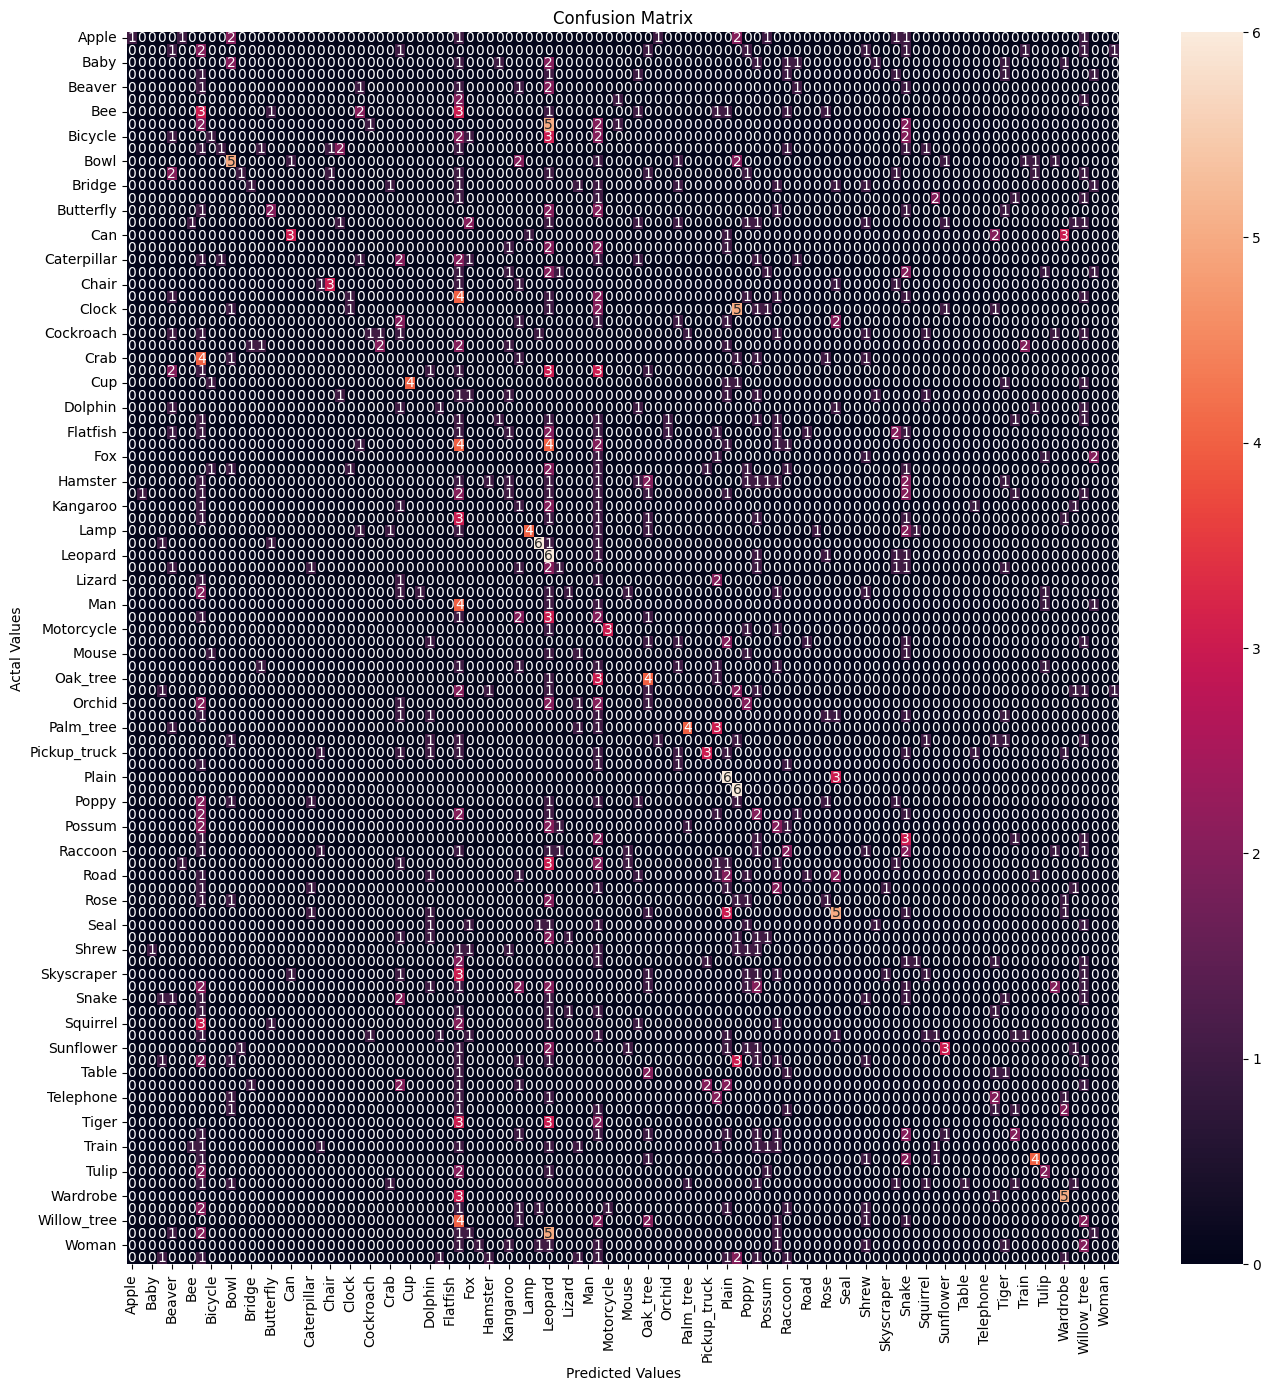

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()